In [43]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

nsample = 2000
x = np.linspace(0, 10, nsample)
x

array([0.00000000e+00, 5.00250125e-03, 1.00050025e-02, ...,
       9.98999500e+00, 9.99499750e+00, 1.00000000e+01])

#### 一元线性回归

In [44]:
X = sm.add_constant(x)
X

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00250125e-03],
       [1.00000000e+00, 1.00050025e-02],
       ...,
       [1.00000000e+00, 9.98999500e+00],
       [1.00000000e+00, 9.99499750e+00],
       [1.00000000e+00, 1.00000000e+01]])

In [45]:
#β0,β1分别设置成2,5
beta = np.array([2, 5])
beta

array([2, 5])

In [27]:
#误差项
e = np.random.normal(size=nsample)
e

array([ 0.90152812, -0.99395285,  0.23326603, ...,  1.39590587,
       -0.01612186, -1.02882072])

In [28]:
#实际值y
y = np.dot(X, beta) + e
y

array([ 2.90152812,  1.03105966,  2.28329104, ..., 53.34588086,
       51.95886563, 50.97117928])

In [29]:
#最小二乘法
model = sm.OLS(y,X)

In [30]:
#拟合数据
res = model.fit()

In [31]:
#回归系数
res.params

array([1.95386713, 5.01507444])

In [32]:
#全部结果
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.064e+05
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:52:12   Log-Likelihood:                -2868.9
No. Observations:                2000   AIC:                             5742.
Df Residuals:                    1998   BIC:                             5753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9539      0.045     43.012      0.000       1.865       2.043
x1             5.0151      0.008    637.472      0.000       5.000       5.031
==============================================================================
Omnibus:                        0.578   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.633
Skew:                          -0.036   Prob(JB):                        0.729
Kurtosis:                       2.950   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#拟合的估计值
y_ = res.fittedvalues
y_

array([ 1.95386713,  1.97895505,  2.00404296, ..., 52.05443569,
       52.07952361, 52.10461153])

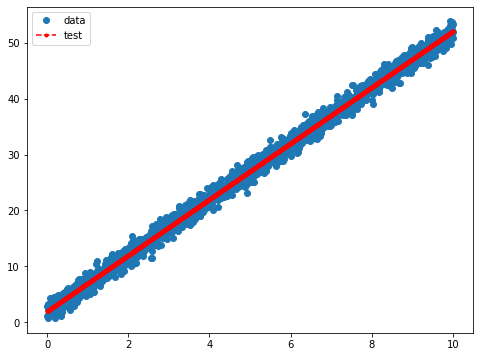

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')#原始数据
ax.plot(x, y_, 'r--.',label='test')#拟合数据
ax.legend(loc='best')
plt.show()

#### 高阶回归

In [53]:
#Y=5+2⋅X+3⋅X^2
 
nsample = 50
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
X = sm.add_constant(X)

In [50]:
beta = np.array([5, 2, 3])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
model = sm.OLS(y,X)
results = model.fit()
results.params

array([5.59271042, 1.6391883 , 3.03652854])

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.295e+05
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.75e-94
Time:                        16:18:03   Log-Likelihood:                -70.099
No. Observations:                  50   AIC:                             146.2
Df Residuals:                      47   BIC:                             151.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5927      0.414     13.523      0.000       4.761       6.425
x1             1.6392      0.191      8.570      0.000       1.254       2.024
x2             3.0365      0.018    164.161      0.000       2.999       3.074
==============================================================================
Omnibus:                        1.260   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                0.752
Skew:                           0.293   Prob(JB):                        0.687
Kurtosis:                       3.130   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

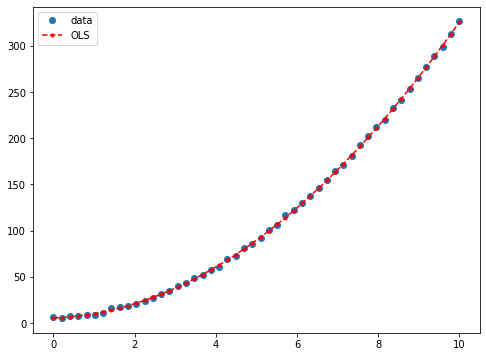

In [52]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
plt.show()

#### 分类变量

假设分类变量有4个取值（a,b,c）,比如考试成绩有3个等级。那么a就是（1,0,0），b（0,1,0），c(0,0,1),这个时候就需要3个系数β0,β1,β2，也就是β0x0+β1x1+β2x2

In [46]:
nsample = 50
groups = np.zeros(nsample,int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [47]:
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)
dummy

D:\ProgramData\Anaconda3\envs\TensorFlow_work\lib\site-packages\statsmodels\tools\tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [48]:
#Y=5+2X+3Z1+6⋅Z2+9⋅Z3.
 
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy))
X = sm.add_constant(X)
beta = [5, 2, 3, 6, 9]
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2973.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.19e-52
Time:                        16:17:48   Log-Likelihood:                -71.434
No. Observations:                  50   AIC:                             150.9
Df Residuals:                      46   BIC:                             158.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2269      0.596     12.116      0.000       6.026       8.428
x1             2.1192      0.069     30.879      0.000       1.981       2.257
x2             0.2070      0.378      0.547      0.587      -0.554       0.968
x3             2.1556      0.316      6.819      0.000       1.519       2.792
x4             4.8643      0.712      6.830      0.000       3.431       6.298
==============================================================================
Omnibus:                        9.716   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.628
Skew:                          -0.736   Prob(JB):                      0.00492
Kurtosis:                       4.713   Cond. No.                     3.77e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.78e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

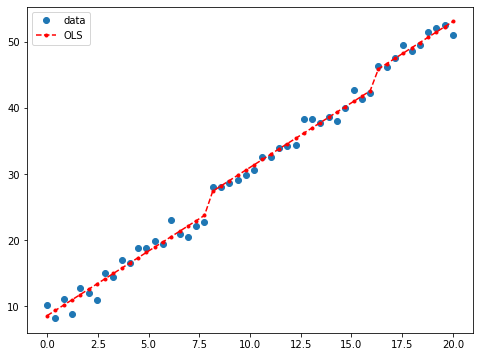

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.show()